## Loan Price Prediction

In this project we are going to do predicting the exact loan amount for the bank clients, the loan amount will be predicting based on the data features ... 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing Zone

In [3]:
# Checking number of the columns
len((df))

614

In [4]:
# Shape of the dataset
df.shape

(614, 13)

In [5]:
# Checking the name of the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# checking the null values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Count the sum of the missing values in each of the features
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

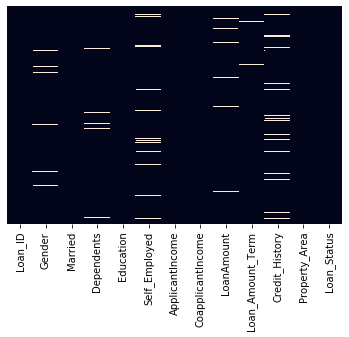

In [8]:
# Visualize the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
# Data Feature Observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Handling the Null / Missing Values in Numerical Values

In [10]:
# Using fillna methods to fillup the maean of the features
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
# Count the sum of the missing values in each of the features
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

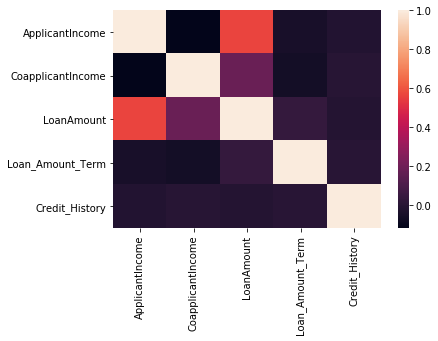

In [12]:
sns.heatmap(df.corr())

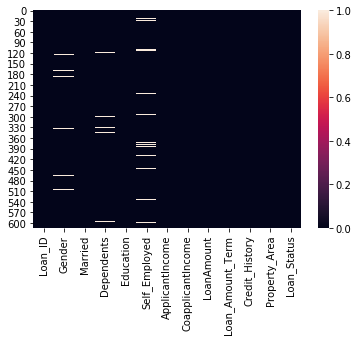

In [ ]:
# After handling the Numerical missing valeu
sns.heatmap(df.isnull())

### Handling the Null / Missing Values in Gategorical Values

In [ ]:
# Knowing the value counts
df['Gender'].value_counts()

In [ ]:
df['Dependents'].value_counts()

In [ ]:
df['Self_Employed'].value_counts()

In [ ]:
# Converting the numerical values from categorical values using get_dummies
Gender = pd.get_dummies(df['Gender'],drop_first=True)
Dependents = pd.get_dummies(df['Dependents'],drop_first=True)
Self_Employed = pd.get_dummies(df['Self_Employed'],drop_first=True)

In [ ]:
# Displays the Converted features
Gender.head()

In [ ]:
Dependents.head()

In [ ]:
Self_Employed.head()

In [ ]:
df.drop(['Gender','Dependents','Self_Employed'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
# Concating the existing Features with new one
df = pd.concat([df,Gender,Dependents,Self_Employed],axis=1)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Converting Other Gategorical Features
# Counts values
df['Loan_ID'].value_counts().head()

In [ ]:
df['Married'].value_counts().head()

In [ ]:
df['Education'].value_counts().head()

In [ ]:
df['Property_Area'].value_counts().head()

In [ ]:
Married = pd.get_dummies(df['Married'],drop_first=True)
Education = pd.get_dummies(df['Education'],drop_first=True)
Property_Area = pd.get_dummies(df['Property_Area'],drop_first=True)

In [ ]:
df.drop(['Married','Education','Property_Area'],axis=1,inplace=True)

In [ ]:
# Concating the existing Features with new one
df = pd.concat([df,Married,Education,Property_Area],axis=1)

In [ ]:
df.head()

### Exploratory Data Analysis

In [ ]:
# Explains Gender of Loan Gave 
# 1 is Male 0 is Female
sns.set_style('whitegrid')
sns.countplot(x='Male',data=df)

In [ ]:
# Education Status 
# 0 - not Graduate 1- Grauduate
sns.set_style('whitegrid')
sns.countplot(x='Not Graduate',data=df)

In [ ]:
df['LoanAmount'].hist(bins=30,color='darkblue',alpha=0.3)

In [ ]:
df['ApplicantIncome'].hist(bins=30,color='darkblue',alpha=0.3)

In [ ]:
sns.countplot(x='Credit_History',data=df)

In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
Y = df['Loan_Status']
Y.head()

In [ ]:
df.drop(['Loan_Status'],inplace=True,axis=1)

In [ ]:
df.head()

In [ ]:
Y.head()

### Model Building

In [ ]:
# Allocating the Values before model building
X = df.iloc[0:].values
y = Y.values

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model_l = LogisticRegression()
model_l.fit(X_train,y_train)

In [ ]:
y_pred = model_l.predict(X_test)

In [ ]:
model_l.score(X_test,y_test)

In [ ]:
print("Confusion Matix : \n", confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy :",accuracy_score(y_test,y_pred) * 100)
print("\n")
print("Report :", classification_report(y_test,y_pred))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=4,min_samples_leaf=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Confusion Matix : \n", confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy :",accuracy_score(y_test,y_pred) * 100)
print("\n")
print("Report :", classification_report(y_test,y_pred))

### Random Forest

In [ ]:
model = RandomForestClassifier(max_depth=None,n_estimators=100) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Confusion Matix : \n", confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy :",accuracy_score(y_test,y_pred) * 100)
print("\n")
print("Report :", classification_report(y_test,y_pred))